In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/digit-recognizer/train.csv')
test_data = pd.read_csv('data/digit-recognizer/test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train, y_train = train_data.iloc[:, 1:].values/255, train_data.iloc[:, :1].values
X_test, y_test = test_data.iloc[:, 1:].values/255, test_data.iloc[:, :1].values

In [5]:
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y_train[:5]

array([[1],
       [0],
       [1],
       [4],
       [0]])

In [7]:
labels = np.zeros((len(y_train), 10))
for i, l in enumerate(y_train):
    labels[i][l] = 1

In [8]:
test_labels = np.zeros((len(y_test), 10))
for i, l in enumerate(y_test):
    test_labels[i][l] = 1

In [9]:
labels[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
X_train[1].shape

(784,)

In [11]:
np.sqrt(784)

28.0

Text(0.5, 1.0, '[0]')

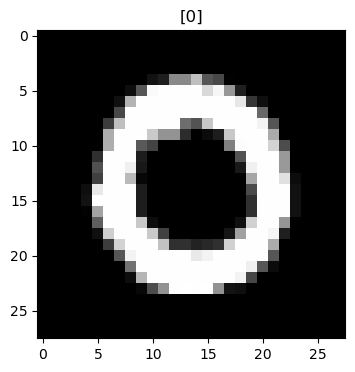

In [12]:
plt.figure(figsize = (4,4))
plt.imshow(X_train[1].reshape(28, 28, 1), cmap = 'gray')
plt.title(y_train[1])

In [13]:
np.random.seed(1)
relu = lambda x: (x >= 0) * x
relu2deriv = lambda x: x>=0
alpha, iterations, hidden_size, pixels_per_image, num_labels = 0.005, 350, 40, 784, 10

In [14]:
weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.1

In [ ]:
for j in range(iterations):
    error, correct_cnt = 0.0, 0
    for i in range(len(X_train)):
        layer_0 = X_train[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2) 
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = labels[i:i+1] - layer_2
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    print(f'Epoch : {j} \nError: {error/float(len(X_train))} \nCorrect: {correct_cnt/float(len(X_train))}')

Epoch : 0 
Error: 0.3440719301961352 
Correct: 0.8480714285714286
Epoch : 1 
Error: 0.27917714907700353 
Correct: 0.8783095238095238
Epoch : 2 
Error: 0.2730133271093989 
Correct: 0.8801190476190476
Epoch : 3 
Error: 0.2664849778892222 
Correct: 0.8842619047619048
Epoch : 4 
Error: 0.2680053973803443 
Correct: 0.8873333333333333
Epoch : 5 
Error: 0.26491768345559685 
Correct: 0.8937619047619048
Epoch : 6 
Error: 0.2669221390883136 
Correct: 0.8926666666666667
Epoch : 7 
Error: 0.2688585571624661 
Correct: 0.8909523809523809
Epoch : 8 
Error: 0.2690387277303692 
Correct: 0.8886190476190476
Epoch : 9 
Error: 0.26292911564681176 
Correct: 0.8875714285714286
Epoch : 10 
Error: 0.25757509229408315 
Correct: 0.8875238095238095
Epoch : 11 
Error: 0.2639858231199374 
Correct: 0.8839523809523809
Epoch : 12 
Error: 0.2676985064534873 
Correct: 0.8881190476190476
Epoch : 13 
Error: 0.2694315012109391 
Correct: 0.8863571428571428
Epoch : 14 
Error: 0.27260586202592696 
Correct: 0.8846428571428572


/tmp/ipykernel_10449/3516337106.py:7: RuntimeWarning: overflow encountered in square
  error += np.sum((labels[i:i+1] - layer_2) ** 2)


Epoch : 137 
Error: nan 
Correct: 0.15354761904761904
Epoch : 138 
Error: nan 
Correct: 0.09838095238095237
Epoch : 139 
Error: nan 
Correct: 0.09838095238095237
Epoch : 140 
Error: nan 
Correct: 0.09838095238095237
Epoch : 141 
Error: nan 
Correct: 0.09838095238095237
Epoch : 142 
Error: nan 
Correct: 0.09838095238095237
Epoch : 143 
Error: nan 
Correct: 0.09838095238095237
Epoch : 144 
Error: nan 
Correct: 0.09838095238095237
Epoch : 145 
Error: nan 
Correct: 0.09838095238095237
Epoch : 146 
Error: nan 
Correct: 0.09838095238095237
Epoch : 147 
Error: nan 
Correct: 0.09838095238095237
Epoch : 148 
Error: nan 
Correct: 0.09838095238095237
Epoch : 149 
Error: nan 
Correct: 0.09838095238095237
Epoch : 150 
Error: nan 
Correct: 0.09838095238095237
Epoch : 151 
Error: nan 
Correct: 0.09838095238095237
Epoch : 152 
Error: nan 
Correct: 0.09838095238095237
Epoch : 153 
Error: nan 
Correct: 0.09838095238095237
Epoch : 154 
Error: nan 
Correct: 0.09838095238095237
Epoch : 155 
Error: nan 
Cor